In [1]:
from PIL import Image,ImageFilter,ImageEnhance
import numpy as np

i = Image.open("LenaGantz.jpg")


In [2]:
i.size

(296, 350)

In [3]:
i.mode

'RGB'

In [4]:
i.show()

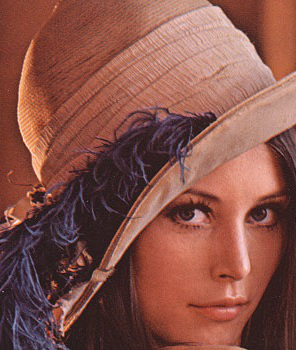

In [5]:
i

In [6]:
i1 = i.convert("L")


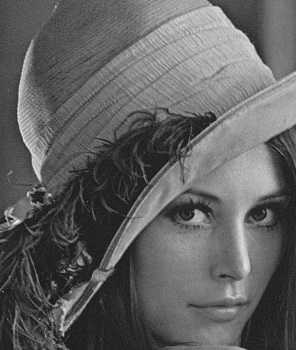

In [7]:
i1

In [8]:
a = np.asarray(i1)


In [9]:
a

array([[ 69,  73,  76, ..., 109,  98, 100],
       [ 72,  76,  75, ..., 104,  96, 101],
       [ 68,  78,  78, ..., 104,  94, 100],
       ...,
       [ 31,  36,  38, ...,  51,  55,  57],
       [ 30,  36,  39, ...,  51,  48,  55],
       [ 33,  38,  41, ...,  54,  47,  56]], dtype=uint8)

In [10]:
j = Image.fromarray(a)

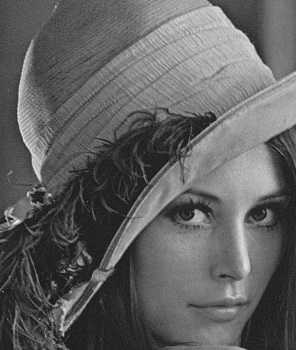

In [11]:
j

In [12]:
########################
# plot white image with black line in the middle rows


In [13]:
jj = np.ones((100,100))*100
jj

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [14]:
jj[50:80, :] = 200
jj

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [15]:
jj = jj.astype('uint8')

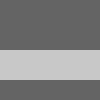

In [16]:
Image.fromarray(jj)

In [17]:
jj2 = Image.fromarray(jj)
jj2.save("aa.jpg")

In [18]:
################################

In [19]:
tmp = Image.fromarray(a[230:280, 230:280])
tmp.save("1111.jpg")
# open in photo editor

In [20]:
################################
# 1. histogram few rows (choose random rows)
# 2. histogram the whole image
# 3. multiply by factor "alpha" and plot the image (fromarray...) what happens? 

In [21]:
import matplotlib.pyplot as plt
plt.hist( a[300, :]  )

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

(array([28., 82., 22., 16., 19., 61., 53.,  5.,  5.,  5.]),
 array([ 20. ,  35.3,  50.6,  65.9,  81.2,  96.5, 111.8, 127.1, 142.4,
        157.7, 173. ]),
 <BarContainer object of 10 artists>)

In [22]:
a.reshape(1,-1)[0]

array([69, 73, 76, ..., 54, 47, 56], dtype=uint8)

In [23]:
len(a.reshape(1,-1)[0])

103600

(array([ 9644., 17249., 15501., 17428., 16061., 11426.,  9846.,  5516.,
          896.,    33.]),
 array([ 14. ,  36.7,  59.4,  82.1, 104.8, 127.5, 150.2, 172.9, 195.6,
        218.3, 241. ]),
 <BarContainer object of 10 artists>)

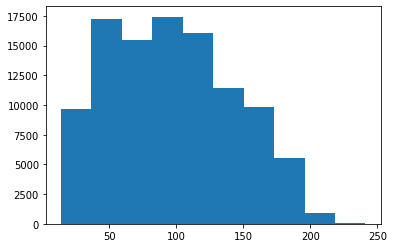

In [24]:
plt.hist(a.reshape(1,-1)[0])

(array([7000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3000.]),
 array([100., 110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <BarContainer object of 10 artists>)

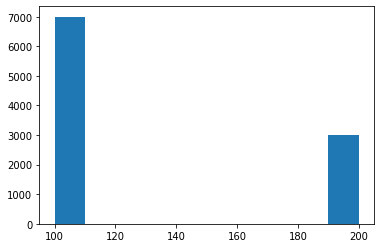

In [25]:
plt.hist(jj.reshape(1,-1)[0])

(array([ 9644., 17249., 15501., 17428., 16061., 11426.,  9846.,  5516.,
          896.,    33.]),
 array([ 25.2 ,  66.06, 106.92, 147.78, 188.64, 229.5 , 270.36, 311.22,
        352.08, 392.94, 433.8 ]),
 <BarContainer object of 10 artists>)

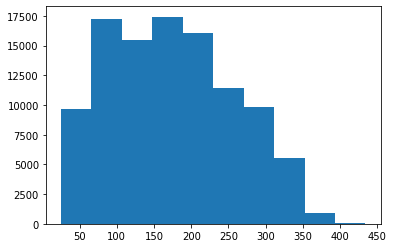

In [26]:
alpha = 1.8
a2 = a*alpha
plt.hist(a2.reshape(1,-1)[0])

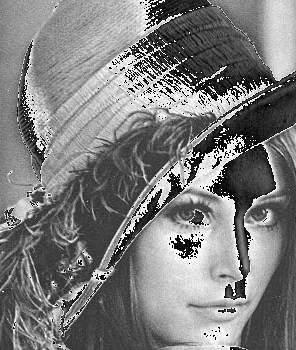

In [27]:
Image.fromarray(a2.astype('uint8'))

In [28]:
np.min(a2)  # => 0

25.2

In [29]:
np.max(a2)   # => 255

433.8

(array([ 9644., 17249., 15501., 17428., 16061., 11426.,  9846.,  5516.,
          896.,    33.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

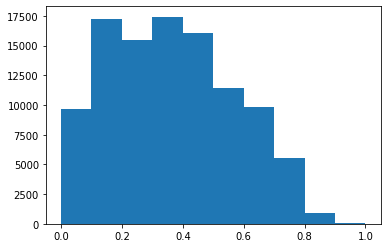

In [30]:
a2_norm = (a2 - a2.min())/(a2.max() - a2.min())
plt.hist(a2_norm.reshape(-1,1))

In [31]:
a2_norm = a2_norm*255
a2_norm

array([[ 61.78414097,  66.27753304,  69.64757709, ..., 106.71806167,
         94.36123348,  96.60792952],
       [ 65.15418502,  69.64757709,  68.52422907, ..., 101.10132159,
         92.11453744,  97.73127753],
       [ 60.66079295,  71.89427313,  71.89427313, ..., 101.10132159,
         89.86784141,  96.60792952],
       ...,
       [ 19.0969163 ,  24.71365639,  26.96035242, ...,  41.56387665,
         46.05726872,  48.30396476],
       [ 17.97356828,  24.71365639,  28.08370044, ...,  41.56387665,
         38.1938326 ,  46.05726872],
       [ 21.34361233,  26.96035242,  30.33039648, ...,  44.9339207 ,
         37.07048458,  47.18061674]])

In [32]:
a2_norm = a2_norm.astype('uint8')

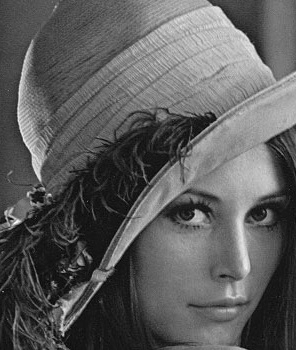

In [33]:
Image.fromarray(a2_norm)

In [34]:
######################################

In [35]:
############################
# matrix dot vs *

In [36]:
x1 = np.array([ [1,2 ] , [3,4]])
x2 = np.array([ [5,6], [7,8]])
x1*x2

array([[ 5, 12],
       [21, 32]])

In [37]:
x1.dot(x2)

array([[19, 22],
       [43, 50]])

In [38]:
#####################################

In [39]:
# sobel filter  - ppt slide
# https://setosa.io/ev/image-kernels/

In [40]:
##############################
# use the grayscale version of the image, take 200X200 fixels from the middle somewhere
# look for "sobel operator" in wikipedia, ___mean___ the result of the matrix mul
# 1. initiate numpy arrays of zeros, in the shape of the new image, one for Gx and one for Gy
# 2. find edges for x, edges for y, using numpy loops. ignore the borders (keep them zeros)
# 3. normilize Gx, Gy to be 0..255, then cast to "astype('uint8')"
# 4. plot each Gx, Gy

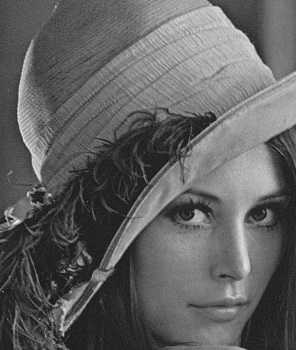

In [41]:
j

In [42]:
j1 = np.asarray(j)
j1

array([[ 69,  73,  76, ..., 109,  98, 100],
       [ 72,  76,  75, ..., 104,  96, 101],
       [ 68,  78,  78, ..., 104,  94, 100],
       ...,
       [ 31,  36,  38, ...,  51,  55,  57],
       [ 30,  36,  39, ...,  51,  48,  55],
       [ 33,  38,  41, ...,  54,  47,  56]], dtype=uint8)

In [43]:
j1.shape

(350, 296)

In [44]:
j11 = j1[150:350, 150:350]
j11

array([[41, 47, 48, ..., 93, 83, 75],
       [48, 48, 49, ..., 88, 89, 76],
       [37, 46, 47, ..., 88, 91, 82],
       ...,
       [41, 42, 49, ..., 51, 55, 57],
       [41, 40, 50, ..., 51, 48, 55],
       [36, 35, 38, ..., 54, 47, 56]], dtype=uint8)

In [45]:
j11.shape

(200, 146)

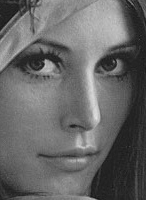

In [46]:
Image.fromarray(j11)

In [47]:
Gx = np.array( [[1,0,-1], [2,0,-2], [1,0,-1]]  )
Gx

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [48]:
Gy = np.array( [[1,2,1], [0,0,0], [-1,-2,-1]]  )
Gy

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [49]:
j1x = np.zeros(j11.shape)
j1x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
for i in range(1, j11.shape[0]-1):
    for j in range(1, j11.shape[1]-1):
        j11_crop = j11[i-1:i+2  , j-1:j+2]
        res = np.mean(j11_crop * Gx)
        j1x[i,j] = res

In [51]:
j1x.shape

(200, 146)

In [52]:
j1x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -2.11111111,  0.66666667, ..., -1.44444444,
         5.33333333,  0.        ],
       [ 0.        , -2.66666667,  0.77777778, ..., -2.        ,
         2.88888889,  0.        ],
       ...,
       [ 0.        , -5.44444444, -5.77777778, ...,  5.33333333,
        -2.        ,  0.        ],
       [ 0.        , -3.11111111, -5.44444444, ...,  3.        ,
        -1.77777778,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
j1x.max()

40.55555555555556

In [54]:
j1x.min()

-66.44444444444444

In [55]:
j1x = np.abs(j1x)

In [56]:
j1x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.11111111, 0.66666667, ..., 1.44444444, 5.33333333,
        0.        ],
       [0.        , 2.66666667, 0.77777778, ..., 2.        , 2.88888889,
        0.        ],
       ...,
       [0.        , 5.44444444, 5.77777778, ..., 5.33333333, 2.        ,
        0.        ],
       [0.        , 3.11111111, 5.44444444, ..., 3.        , 1.77777778,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
j1x_norm = (j1x - j1x.min())/(j1x.max()-j1x.min())*255

In [58]:
j1x_norm

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.10200669,  2.55852843, ...,  5.54347826,
        20.46822742,  0.        ],
       [ 0.        , 10.23411371,  2.98494983, ...,  7.67558528,
        11.08695652,  0.        ],
       ...,
       [ 0.        , 20.89464883, 22.17391304, ..., 20.46822742,
         7.67558528,  0.        ],
       [ 0.        , 11.93979933, 20.89464883, ..., 11.51337793,
         6.82274247,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
j1x_norm2 = j1x_norm.astype('uint8')
j1x_norm2

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  2, ...,  5, 20,  0],
       [ 0, 10,  2, ...,  7, 11,  0],
       ...,
       [ 0, 20, 22, ..., 20,  7,  0],
       [ 0, 11, 20, ..., 11,  6,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

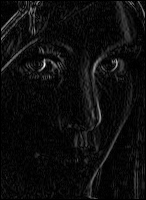

In [60]:
Image.fromarray(j1x_norm2)

In [61]:
j1y = np.zeros(j11.shape)

In [62]:
for i in range(1, j11.shape[0]-1):
    for j in range(1, j11.shape[1]-1):
        j11_crop = j11[i-1:i+2  , j-1:j+2]
        res = np.mean(j11_crop * Gy)
        j1y[i,j] = res

In [63]:
j1y

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.77777778,  0.22222222, ...,  0.11111111,
        -2.        ,  0.        ],
       [ 0.        ,  4.44444444,  4.55555556, ..., -2.44444444,
        -3.33333333,  0.        ],
       ...,
       [ 0.        ,  1.        ,  2.44444444, ...,  2.22222222,
         0.88888889,  0.        ],
       [ 0.        ,  3.33333333,  4.55555556, ...,  2.33333333,
         1.55555556,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

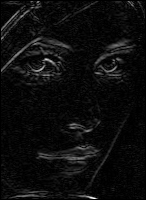

In [64]:
j1y = np.abs(j1y)
j1y_norm = (j1y - j1y.min())/(j1y.max()-j1y.min())*255
j1y_norm2 = j1y_norm.astype('uint8')
Image.fromarray(j1y_norm2)

In [65]:
###########################################################

In [66]:
#########################################
# 5. the final G is sqrt(Gx**2 +Gy**2) (note - cast np array to 'int' before squering it!)
# 6. plot the G 
# 6.1 do the same for G = Gx + Gy
# 7. put some threshold on G (G > threshold) and plot it also to see clear edges

In [67]:
j1x_norm2

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  2, ...,  5, 20,  0],
       [ 0, 10,  2, ...,  7, 11,  0],
       ...,
       [ 0, 20, 22, ..., 20,  7,  0],
       [ 0, 11, 20, ..., 11,  6,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [68]:
G = np.sqrt(j1x_norm2.astype('int')**2 + j1y_norm2.astype('int')**2)
G

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.54400375,  2.        , ...,  5.        ,
        21.54065923,  0.        ],
       [ 0.        , 20.59126028, 18.11077028, ..., 12.20655562,
        17.02938637,  0.        ],
       ...,
       [ 0.        , 20.39607805, 24.16609195, ..., 21.9317122 ,
         7.61577311,  0.        ],
       [ 0.        , 17.02938637, 26.90724809, ..., 14.2126704 ,
         8.48528137,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
G.min()

0.0

In [70]:
G.max()

276.1539425755135

In [71]:
G = j1x_norm2 + j1y_norm2
G

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  2, ...,  5, 28,  0],
       [ 0, 28, 20, ..., 17, 24,  0],
       ...,
       [ 0, 24, 32, ..., 29, 10,  0],
       [ 0, 24, 38, ..., 20, 12,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [72]:
G.max()

254

In [73]:
G = (G - G.min())/(G.max() - G.min())*255
G = G.astype('uint8')

In [74]:
G

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  2, ...,  5, 28,  0],
       [ 0, 28, 20, ..., 17, 24,  0],
       ...,
       [ 0, 24, 32, ..., 29, 10,  0],
       [ 0, 24, 38, ..., 20, 12,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

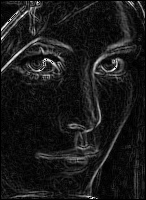

In [75]:
Image.fromarray(G)

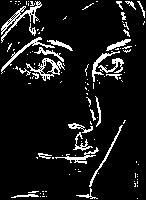

In [76]:
th = 62
Image.fromarray(255*(G > th).astype('uint8'))

In [77]:
######################################################

In [78]:
i = Image.open("LenaGantz.jpg")

In [79]:
out = i.transpose(Image.FLIP_LEFT_RIGHT)

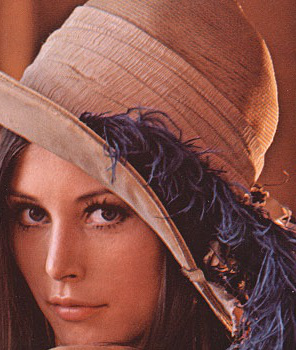

In [80]:
out

In [81]:
blurred = i.filter(ImageFilter.BLUR)

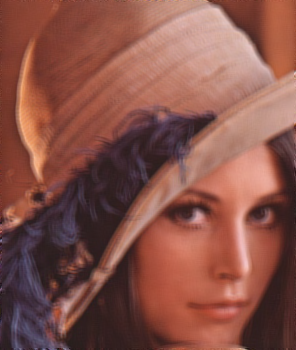

In [82]:
blurred

In [83]:
###################
# TRY OTHER FILTERS

In [84]:
out = i.point(lambda i: i * 2)

In [85]:
###################
# TRY OTHER NUMBERS

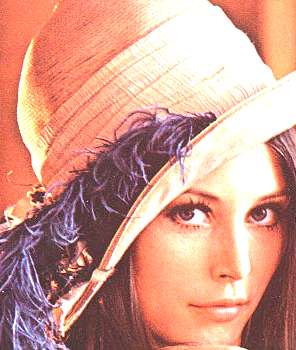

In [86]:
out

In [87]:
source = i.split()

R, G, B = 0, 1, 2

# select regions where red is less than 50
mask = source[R].point(lambda i: i < 50 and 255)

# process the green band
out = source[G].point(lambda i: i * 12)

# paste the processed band back, but only where red was < 50
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(i.mode, source)

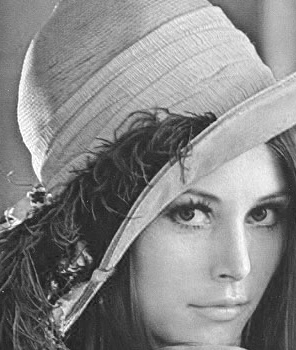

In [88]:
source[R]

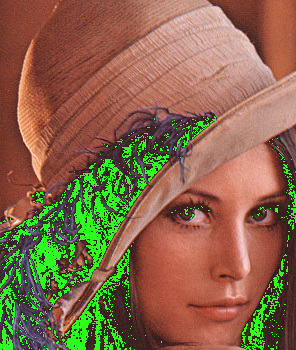

In [89]:
im

In [90]:
###################
# try to enhance the red colors where blue is > 50
# SAVE THE IMAGE


In [91]:
source = i.split()

R, G, B = 0, 1, 2

# select regions where red is less than 50
mask = source[B].point(lambda i: i > 100 and 255)

# process the green band
out = source[R].point(lambda i: i * 4)

# paste the processed band back, but only where red was < 50
source[R].paste(out, None, mask)

# build a new multiband image
im = Image.merge(i.mode, source)

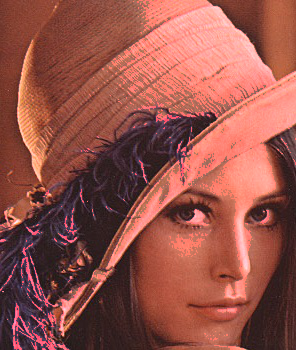

In [92]:
im

In [93]:
##############################################

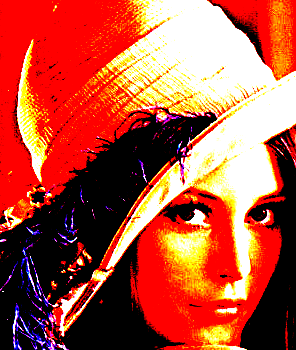

In [94]:
enh = ImageEnhance.Contrast(i)
enh.enhance(11.7)